# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import math

import json
# import requests
# import gmaps
# from sodapy import Socrata
import geopandas as gpd
from shapely.geometry import Polygon, LineString, Point
# from shapely.geometry.polygon import Polygon

import warnings
warnings.filterwarnings('ignore')

### Read in data

In [2]:
df = pd.read_csv('data/venue_neighborhood_category.csv')
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,venue,address,latitude,longitude,neighborhood,category
0,McDonald's,13749 N Highway 183,30.459677,-97.792390,ANDERSON MILL,Fast Food Restaurant
1,P. Terry's Burger Stand,13770 N Highway 183,30.461215,-97.795304,ANDERSON MILL,Burger Joint
2,Pluckers Wing Bar,11066 Pecan Park Blvd Ste G,30.468469,-97.803540,AVERY RANCH--LAKELINE,Wings Joint
3,The Halal Gurus,13729 US-183 suite 890,30.458305,-97.791930,ANDERSON MILL,Middle Eastern Restaurant
4,Texas Roadhouse,"13435 N. US 183 SVRD NB, Bldg. 7",30.447093,-97.788729,ANDERSON MILL,Steakhouse


In [3]:
df.shape

(1433, 6)

In [4]:
df[df['category'] == 'Fast Food Restaurant']

,venue,address,latitude,longitude,neighborhood,category
0,McDonald's,13749 N Highway 183,30.459677,-97.792390,ANDERSON MILL,Fast Food Restaurant
13,McDonald's,12801 Ranch Road 620 N,30.465483,-97.803176,ANDERSON MILL,Fast Food Restaurant
15,Burger King,13450 Highway 183 North,30.447818,-97.791097,ANDERSON MILL,Fast Food Restaurant
19,Wendy’s,10203 Lake Creek Pkwy,30.461564,-97.792190,ANDERSON MILL,Fast Food Restaurant
30,McDonald's,5355 N Interregional Hwy,30.313230,-97.707413,WINDSOR PARK,Fast Food Restaurant
...,...,...,...,...,...,...
1205,SONIC Drive In,5105 E Stassney Ln,30.192962,-97.739405,FRANKLIN PARK,Fast Food Restaurant
1218,Jack in the Box,904 E Braker Ln,30.376071,-97.673121,TECH RIDGE,Fast Food Restaurant
1242,McDonald's,5017 W Highway 290,30.232391,-97.822618,EAST OAK HILL,Fast Food Restaurant
1243,Chick-fil-A,5033-D US 290 West,30.232982,-97.824788,EAST OAK HILL,Fast Food Restaurant


### Neighborhood distribution
#### A pretty gradual decline with an average count of 15, max of 60, minimum of 1 and STD of 11.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(

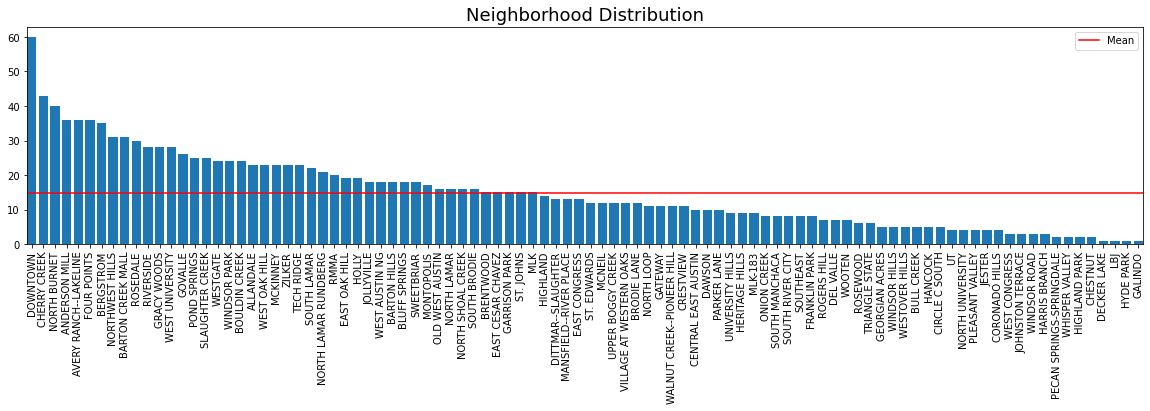

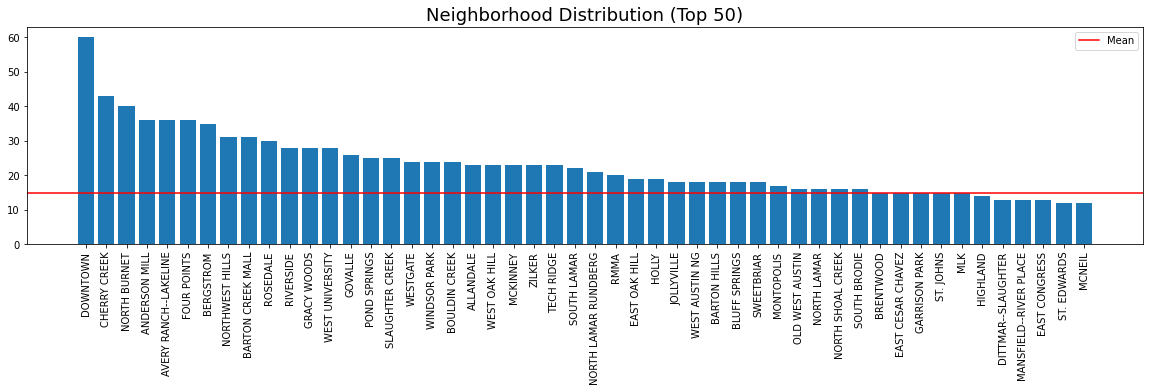

In [5]:
plt.figure(figsize=(20, 4))
neighborhood_counts = df['neighborhood'].value_counts()
x=neighborhood_counts.index
y=neighborhood_counts.values
plt.bar(x, y)
plt.title('Neighborhood Distribution', fontsize=18)
plt.axhline(y = neighborhood_counts.values.mean(), color = 'r', linestyle = '-', label='Mean')
# plt.axhline(y = neighborhood_counts.values.mean() + neighborhood_counts.values.std(), color = 'g', linestyle = '--', label='STD')
# plt.axhline(y = neighborhood_counts.values.mean() - neighborhood_counts.values.std(), color = 'g', linestyle = '--', label='STD')
plt.legend()
plt.xticks(rotation = 90)
plt.margins(x=0)
# plt.savefig('assets/neighborhood_distro.png');

plt.figure(figsize=(20, 4))
neighborhood_counts = df['neighborhood'].value_counts()
x=neighborhood_counts.index[0:50]
y=neighborhood_counts.values[0:50]
plt.bar(x, y)
plt.title('Neighborhood Distribution (Top 50)', fontsize=18)
plt.axhline(y = neighborhood_counts.values.mean(), color = 'r', linestyle = '-', label='Mean')
# plt.axhline(y = neighborhood_counts.values.mean() + neighborhood_counts.values.std(), color = 'g', linestyle = '--', label='STD')
# plt.axhline(y = neighborhood_counts.values.mean() - neighborhood_counts.values.std(), color = 'g', linestyle = '--', label='STD')
plt.legend()
plt.xticks(rotation = 90)
# plt.savefig('assets/top25_neighborhood_distro.png');

### Category Distribution
#### Just 8 categories account for more than half of the restaurants in Austin. I imagine any cluster with more than one or two neighborhoods will include a few of these categories.

In [6]:
# category_counts_df

In [7]:
category_counts = df['category'].value_counts()
category_counts_norm = df['category'].value_counts(normalize=True)
category_counts_df = pd.DataFrame(data=category_counts)
category_counts_df['normalized'] = category_counts_norm
# [round((count / sum(category_counts.values)) * 100, 2) for count in category_counts.values]

In [8]:
sum_ = 0
for i in category_counts_df.index[0:8]:
    sum_ += category_counts_df.loc[i][1]
    
    print(i, category_counts_df.loc[i][1])
    print('Total percentage of restaurants:', sum_)
    print('----------------------')

Mexican Restaurant 0.11165387299371947
Total percentage of restaurants: 0.11165387299371947
----------------------
Serves Impossible Products 0.07815771109560363
Total percentage of restaurants: 0.18981158408932308
----------------------
Fast Food Restaurant 0.07676203768318214
Total percentage of restaurants: 0.2665736217725052
----------------------
Pizza Place 0.061409630146545706
Total percentage of restaurants: 0.3279832519190509
----------------------
Food Truck 0.05792044661549198
Total percentage of restaurants: 0.38590369853454287
----------------------
Taco Place 0.04884856943475227
Total percentage of restaurants: 0.4347522679692951
----------------------
American Restaurant 0.04326587578506629
Total percentage of restaurants: 0.4780181437543614
----------------------
Burger Joint 0.0418702023726448
Total percentage of restaurants: 0.5198883461270062
----------------------


#### While project pollo is interested in restaurants serving meat alternatives, they may also be interested more traditioanl food spots such as fried chicken, burger or wing joints.

#### Several of these categories are included in the top eight categories, and most have a total count above the distribution's mean.

In [9]:
#Specific restaurant categories of interest to Project Pollo
of_interest = ['Serves Impossible Products', 'Serves Beyond Products', 'Serves Oatly Products', 
               'Fast Food Restaurant', 'Burger Joint', 'Wings Joint', 
               'Sandwich Place','BBQ Joint','Fried Chicken Joint',
               'Vegetarian / Vegan Restaurant', 'Burrito Place', 
               'Food Truck','Comfort Food Restaurant']

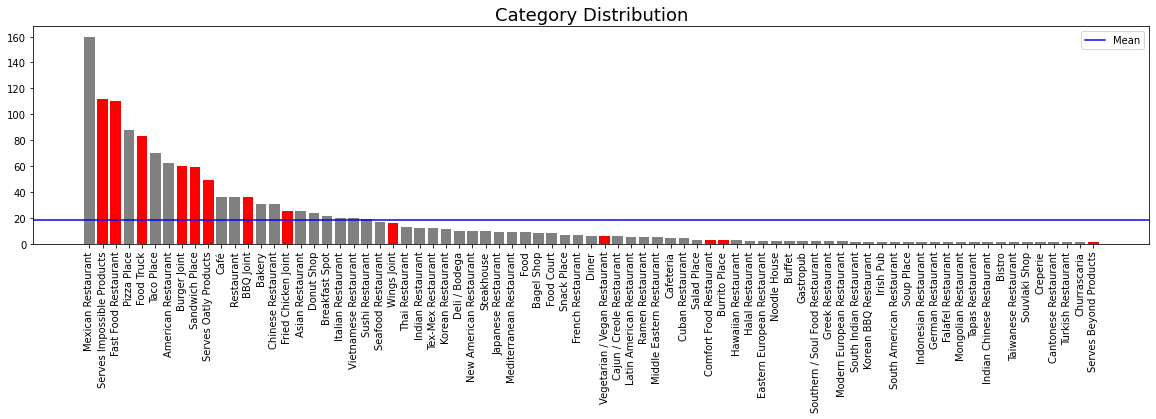

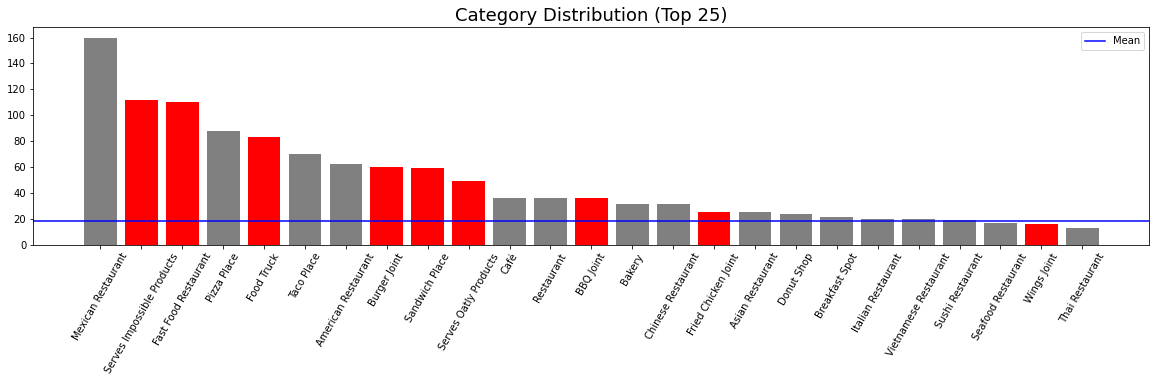

In [10]:
plt.figure(figsize=(20, 4))
clrs = ['red' if category_counts.index[i] in of_interest else 'grey' for i in range(0, len(category_counts))]
x=category_counts.index
y=category_counts.values
plt.bar(x, y, color=clrs)
plt.title('Category Distribution', fontsize=18)
plt.axhline(y = category_counts.values.mean(), color = 'b', linestyle = '-', label='Mean')
plt.legend()
plt.xticks(rotation = 90);

plt.figure(figsize=(20, 4))
category_counts = df['category'].value_counts()
x=category_counts.index[0:25]
y=category_counts.values[0:25]
plt.bar(x, y, color=clrs)
plt.title('Category Distribution (Top 25)', fontsize=18)
plt.axhline(y = category_counts.values.mean(), color = 'b', linestyle = '-', label='Mean')
plt.legend()
plt.xticks(rotation = 60);

#### Groupby showing the top neighborhoods for each of the restaurant categories of interest

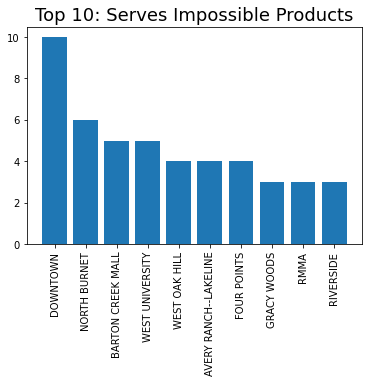

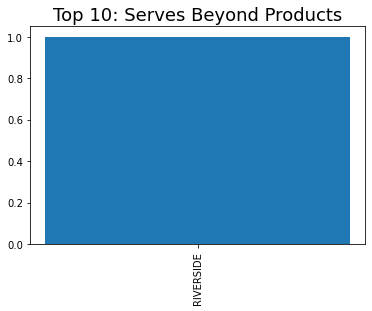

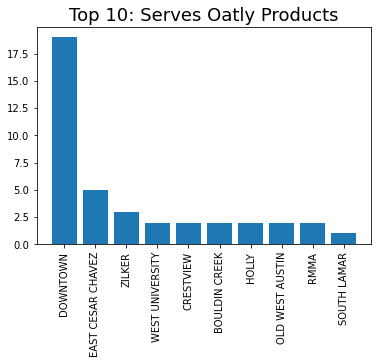

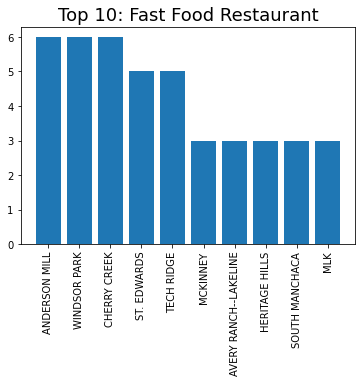

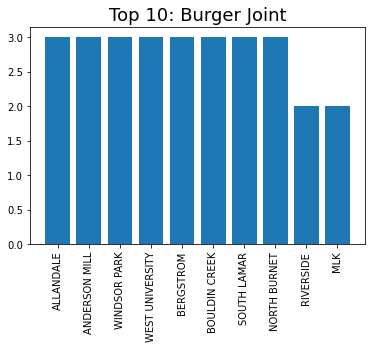

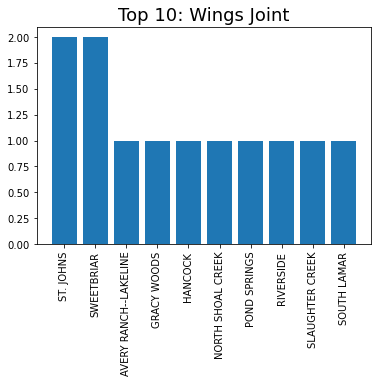

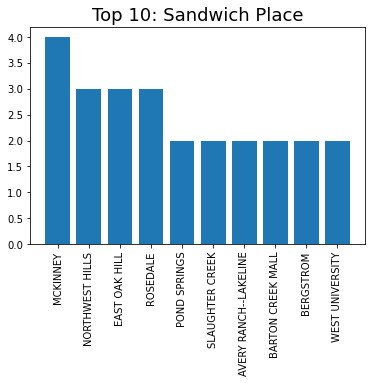

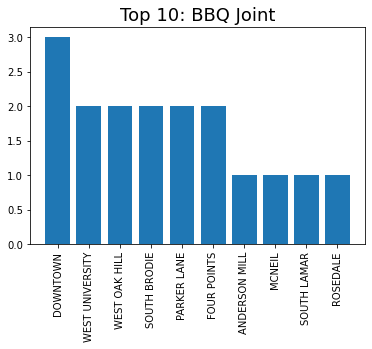

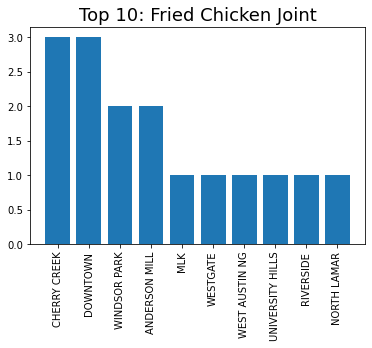

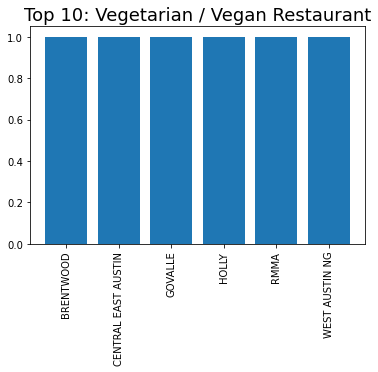

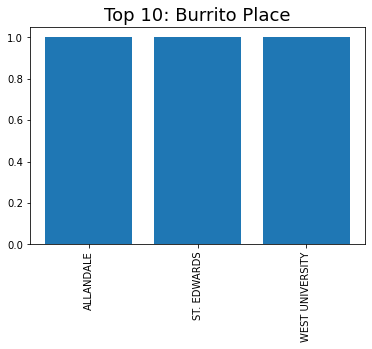

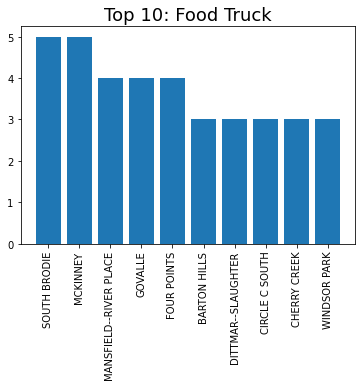

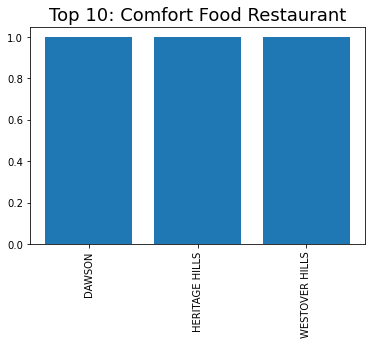

In [11]:
for category in of_interest:
    plot_df = df[df['category'] == category]
    plot=plot_df.groupby('neighborhood').count()['venue'].sort_values(ascending=False)
    plt.bar(plot[:10].index, plot[:10].values)
    plt.title(f'Top 10: {category}', fontsize=18)
    plt.xticks(rotation = 90)
#     plt.savefig(f'assets/{category}_top10_neighborhoods.png')
    plt.show(); #creates a new plot for each iteration

In [12]:
neighborhoods_df = pd.read_csv('data/neighborhoods.csv')
neighborhoods_df.drop(columns='Unnamed: 0', inplace=True)

# Convert the geo data from strings back to lists of floats (a result of the csv export/import)
neighborhoods_df['gmaps_center_coords'] = neighborhoods_df['gmaps_center_coords'].map(lambda x: json.loads(x))
neighborhoods_df['stripped_geom'] = neighborhoods_df['stripped_geom'].map(lambda x: json.loads(x))
neighborhoods_df['calculated_center_coords'] = neighborhoods_df['calculated_center_coords'].map(lambda x: json.loads(x))

In [13]:
from scipy import ndimage
from collections import Counter

#### Interestingly the neighborhoods with the highest restaurant count seem to be more on the outskirts. My intuition was that they'd be closer to downtown.

''

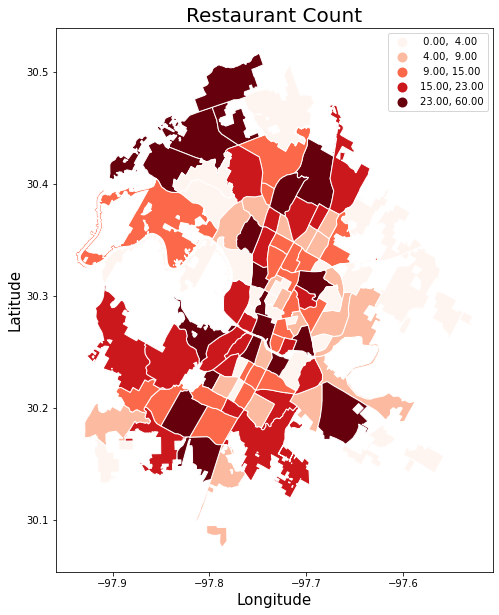

In [14]:
atx = gpd.GeoDataFrame.from_file('data/Neighborhoods')
neighborhood_vcounts = df.groupby('neighborhood').count()['venue']
num_list = []
for i in atx['neighname']:
    try:
        num_list.append(neighborhood_vcounts[i])
    except:
        num_list.append(0)
atx['num_restaurants'] = num_list

fig, ax = plt.subplots(figsize=(10, 10))
atx.plot(column='num_restaurants',
         cmap='Reds', 
         ax=ax, 
         scheme='quantiles',
         edgecolor='white',
         legend=True)
plt.title('Restaurant Count', fontsize=20)
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Latitude', fontsize=15)

;

Text(117.05663224924328, 0.5, 'Latitude')

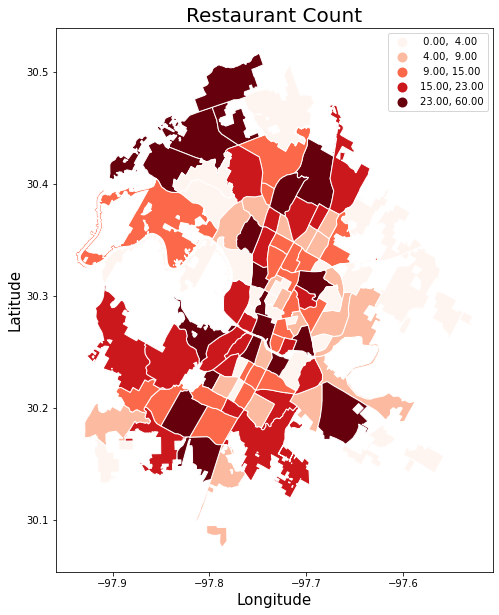

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
atx.plot(column='num_restaurants',
         cmap='Reds', 
         ax=ax, 
         scheme='quantiles',
         edgecolor='white',
         legend=True)
plt.title('Restaurant Count', fontsize=20)
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Latitude', fontsize=15)


#### The `Serves Impossible Products`, `Serves Oatly Products`, `Serves Beyond Products` and `Vegetarian / Vegan Restaurant` categories appear to be huddled closer to downtown, while the more traditional catefories are spread across town.

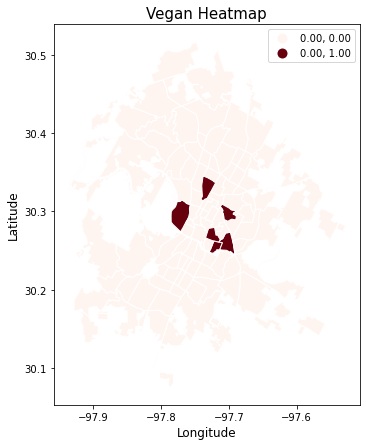

In [16]:
value_counts = df[df['category'] == 'Vegetarian / Vegan Restaurant']['neighborhood'].value_counts()
num_list = []
for i in atx['neighname']:
    try:
        num_list.append(value_counts[i])
    except:
        num_list.append(0)
atx['num_restaurants'] = num_list

fig, ax = plt.subplots(figsize=(7, 7))
atx.plot(column='num_restaurants',
    cmap='Reds', 
    ax=ax, 
    scheme='quantiles',
    edgecolor='white',
    legend=True)
plt.title(f"Vegan Heatmap", fontsize=15)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
# plt.savefig(f'assets/vegan_heatmap.png')
plt.show();

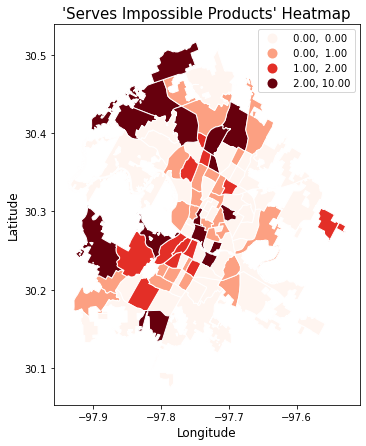

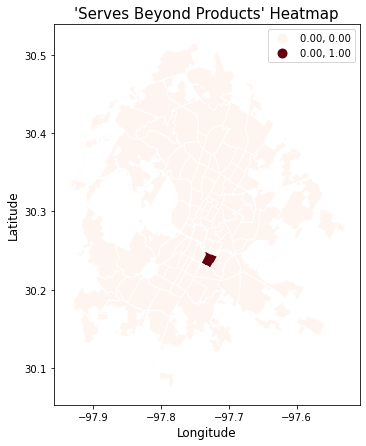

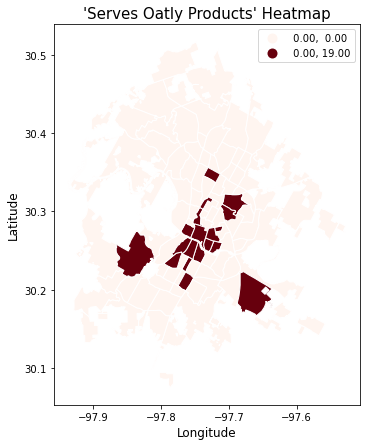

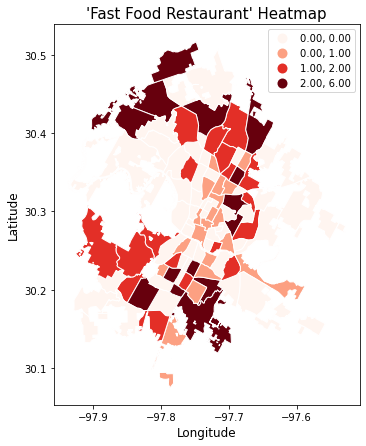

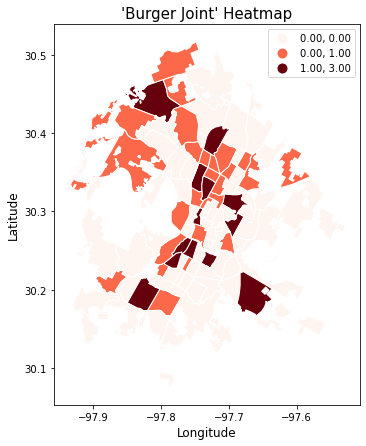

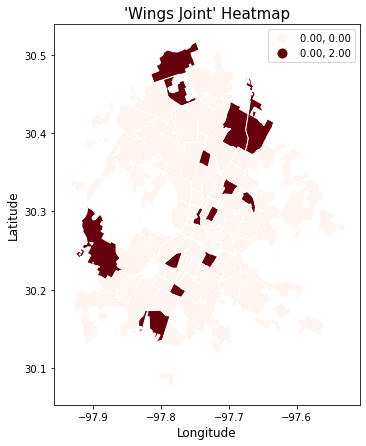

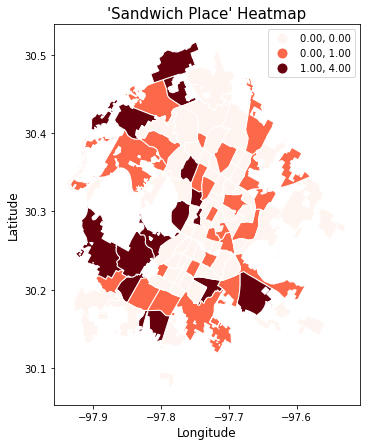

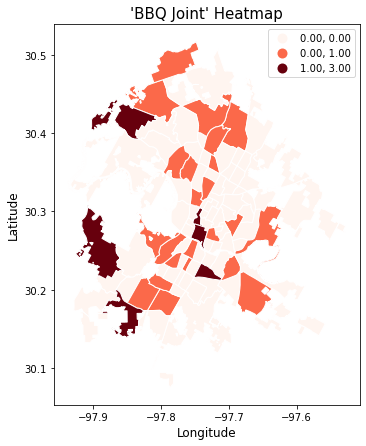

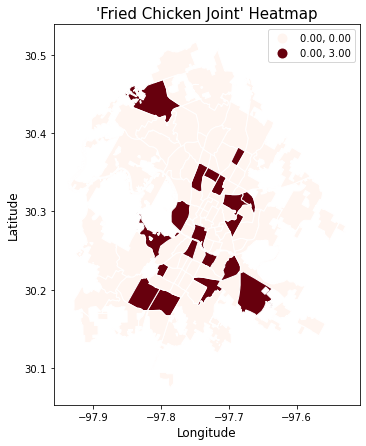

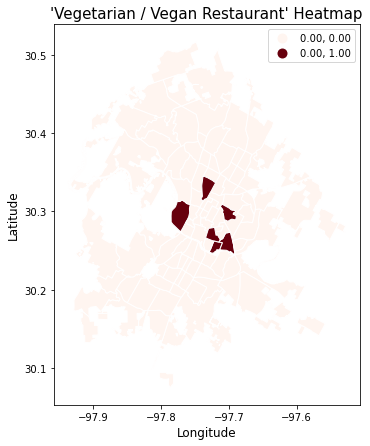

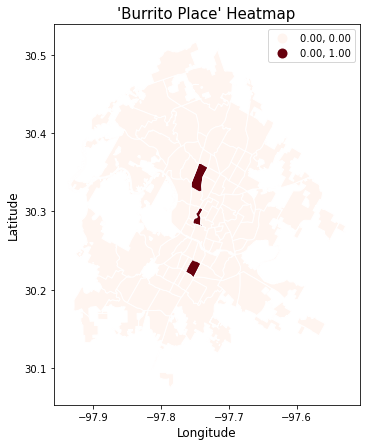

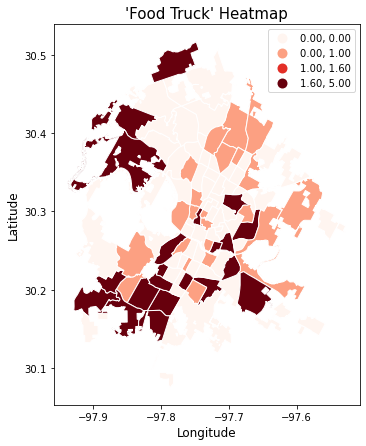

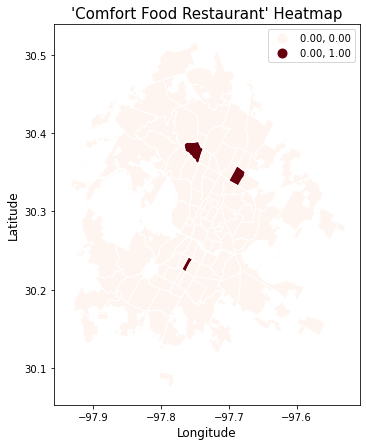

In [17]:
atx = gpd.GeoDataFrame.from_file('data/Neighborhoods')

for category in of_interest:
    value_counts = df[df['category'] == category]['neighborhood'].value_counts()
    num_list = []
    for i in atx['neighname']:
        try:
            num_list.append(value_counts[i])
        except:
            num_list.append(0)
    atx['num_restaurants'] = num_list

    fig, ax = plt.subplots(figsize=(7, 7))
    atx.plot(column='num_restaurants',
             cmap='Reds', 
             ax=ax, 
             scheme='quantiles',
             edgecolor='white',
            legend=True)
    plt.title(f"'{category}' Heatmap", fontsize=15)
    plt.xlabel('Longitude', fontsize=12)
    plt.ylabel('Latitude', fontsize=12)
#     plt.savefig(f'assets/{category}_heatmap.png')
    plt.show();

In [18]:
#how about'Serves Impossible Products', 'Burger Joint' and 'Fried Chicken Joint' specifically?
top_3 = ['Serves Impossible Products', 'Burger Joint', 'Fried Chicken Joint']
top_3_df = df[df['category'].isin(top_3)]
top_3_df=top_3_df[['neighborhood', 'category']]
top_3_df = pd.get_dummies(top_3_df, columns=['category'], prefix="", prefix_sep="").groupby('neighborhood').sum()
top_3_df[(top_3_df['Burger Joint'] > 0) & (top_3_df['Fried Chicken Joint'] > 0) & (top_3_df['Serves Impossible Products'] > 0)]

,Burger Joint,Fried Chicken Joint,Serves Impossible Products
neighborhood,,,
ALLANDALE,3,1,1
ANDERSON MILL,3,2,3
BOULDIN CREEK,3,1,2
CHERRY CREEK,2,3,2
CRESTVIEW,1,1,1
DOWNTOWN,1,3,10
HIGHLAND,1,1,1
RIVERSIDE,2,1,3
WEST AUSTIN NG,1,1,1


In [19]:
venues_df = pd.DataFrame(data=df['venue'].value_counts().reset_index()).rename(columns={'index': 'venue', 'venue': 'sum'})
for i in range(1, len(venues_df)):
    if len(venues_df[venues_df['sum']==i]) == 0:
        pass
    else:
        print(i, len(venues_df[venues_df['sum']==i]))

1 851
2 68
3 27
4 8
5 7
6 5
7 6
8 1
9 2
10 2
12 1
13 1
16 1
17 1
18 2
25 1
61 1


In [20]:
venues_df.groupby('sum').count()

,venue
sum,
1,851
2,68
3,27
4,8
5,7
6,5
7,6
8,1
9,2


In [21]:
venues_df.groupby('sum').count()

,venue
sum,
1,851
2,68
3,27
4,8
5,7
6,5
7,6
8,1
9,2
